# ABOUT THE DATASET
The dataset contains transactions made by credit cards by European cardholders.This dataset presents transactions that have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. The data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

- **Dataset Highlights:**

- **Source: Kaggle** - Credit Card Fraud Detection
- **Number of Fraudulent Transactions:** 492 (0.172% of total transactions).
- **Class Distribution:** Highly imbalanced, with a significant majority of non-fraudulent (Class 0) transactions.

# Features:

- **Time**:Number of seconds elapsed between this transaction and the first transaction in the dataset
- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not

# 1. Data Loading and Initial Exploration

In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession

In [3]:
# Initialize Spark session
spark=SparkSession.builder.master("local[*]").appName("CreditCardFraudDetection").getOrCreate()
spark


In [5]:
# Load the dataset
file_path = r"C:\Users\taman\OD\Desktop\DOCUMENTS\SPARK ASSIGNMENT-1\creditcard.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)



In [7]:
# Show the schema and the first 10 rows
data.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [9]:
# Display a subset of columns to avoid overlap
data.select("Time", "V1", "V2", "V3", "Amount", "Class").show(10, truncate=False)


+----+------------------+-------------------+------------------+------+-----+
|Time|V1                |V2                 |V3                |Amount|Class|
+----+------------------+-------------------+------------------+------+-----+
|0.0 |-1.3598071336738  |-0.0727811733098497|2.53634673796914  |149.62|0    |
|0.0 |1.19185711131486  |0.26615071205963   |0.16648011335321  |2.69  |0    |
|1.0 |-1.35835406159823 |-1.34016307473609  |1.77320934263119  |378.66|0    |
|1.0 |-0.966271711572087|-0.185226008082898 |1.79299333957872  |123.5 |0    |
|2.0 |-1.15823309349523 |0.877736754848451  |1.548717846511    |69.99 |0    |
|2.0 |-0.425965884412454|0.960523044882985  |1.14110934232219  |3.67  |0    |
|4.0 |1.22965763450793  |0.141003507049326  |0.0453707735899449|4.99  |0    |
|7.0 |-0.644269442348146|1.41796354547385   |1.0743803763556   |40.8  |0    |
|7.0 |-0.89428608220282 |0.286157196276544  |-0.113192212729871|93.2  |0    |
|9.0 |-0.33826175242575 |1.11959337641566   |1.04436655157316  |

In [11]:
# Convert to Pandas DataFrame for better display in Jupyter Notebook
data_in_pd=data.limit(10).toPandas()
data_in_pd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
# Show only the column names
print(data.columns)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [15]:

# Count the total number of rows
total_rows = data.count()
print(f"Total number of rows: {total_rows}")


Total number of rows: 284807


In [17]:
# Counting the total number of Fraud and non-Fraud Transactions in dataset
data.groupBy("Class").count().show()


+-----+------+
|Class| count|
+-----+------+
|    1|   492|
|    0|284315|
+-----+------+



**As it can be seen , it is a highly imbalanced dataset with just 492 fraud transactions out of 284807**

# 2. Data Cleaning and Transformation

In [19]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql import functions as F


# 1. Checking for missing values in each column
data.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in data.columns]).show()



+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+




**As it can be seen through analysis , there are no null values in any of the 31 columns**

In [21]:
# 2. Remove Duplicate Records
# Dropping duplicate rows (if any)
data = data.dropDuplicates()



In [23]:
# 3. Convert Columns to Appropriate Data Types
# Check current data types
data.printSchema()



root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

**There is no need to convert  datatype of any feature as our amount and other anonymous features are "Double" type and our target variable "Class" is "Integer" type**


In [25]:
# 4. Filter Out Invalid Rows
# Remove rows with invalid 'Amount' values (e.g., Amount < 0)
data = data.filter(col("Amount") >= 0)


In [27]:
# 5. Normalization 
# Here we standardize the 'Amount' column
from pyspark.ml.feature import StandardScaler, VectorAssembler

# Assemble the 'Amount' column into a vector for scaling
assembler = VectorAssembler(inputCols=["Amount"], outputCol="AmountVec")
data = assembler.transform(data)




In [29]:
# Apply StandardScaler for normalization
scaler = StandardScaler(inputCol="AmountVec", outputCol="ScaledAmount")
scaler_model = scaler.fit(data)
data = scaler_model.transform(data)



In [31]:
# Drop temporary 'AmountVec' column after scaling
data = data.drop("AmountVec")

In [33]:
data.select( "V1", "V2", "V3", "Amount","ScaledAmount", "Class").show(10, truncate=False)

+------------------+-------------------+------------------+------+----------------------+-----+
|V1                |V2                 |V3                |Amount|ScaledAmount          |Class|
+------------------+-------------------+------------------+------+----------------------+-----+
|-0.529912284186556|0.873891581460326  |1.34724732930113  |6.14  |[0.02452082189450426] |0    |
|-0.600816388115364|0.922454525911535  |-0.135951820418704|1.79  |[0.007148578369896194]|0    |
|-1.5057791635308  |-0.215325117259078 |1.99129427646285  |82.29 |[0.3286349240551719]  |0    |
|-0.491003017302294|0.906952627077483  |1.64542281975857  |9.03  |[0.03606238138556571] |0    |
|-0.528217504778877|0.981231846386665  |1.6529880537617   |6.99  |[0.027915398215404688]|0    |
|-3.90081029867848 |-3.09837020429443  |-0.21342836428919 |1528.9|[6.105844396499603]   |0    |
|-1.53695801321944 |-0.0414224787415122|0.62984626092522  |1.0   |[0.003993619201059326]|0    |
|-1.21250203984735 |-0.058850913337692 |

**Since the amount column had different range of values compared to other fetaures from "v1-v28", it was necessary to scale it for accurate analysis.**

### Explanation of Each Transformation:
- **filter():** Used to remove rows based on a specific condition. Here, rows with an Amount value less than 0 are filtered out.
- **drop():** Removes null values or duplicates from the dataset.
- **drop():** Removes null values or duplicates from the dataset.
- **drop():** Removes null values or duplicates from the dataset.
- **fillna():** Fills missing values with specified values. This is useful when we want to impute null values in certain columns.
- **withColumn():** Used to cast columns to the desired data type and to add new columns created from transformations or UDFs.
- **cast():** Changes data types of columns, ensuring they match the desired format (e.g., DoubleType for Amount).


- **Balancing the Dataset with Undersampling:**
- We’ll proceed with undersampling by reducing the non-fraudulent transactions to match the number of fraudulent transactions.

In [35]:
# Count the number of instances in each class
fraud_df = data.filter(data.Class == 1)
non_fraud_df = data.filter(data.Class == 0)

# Determine the count of the minority class (fraud)
fraud_count = fraud_df.count()

# Undersample the majority class (non-fraud) to match the minority count
non_fraud_sampled_df = non_fraud_df.sample(fraction=fraud_count / non_fraud_df.count(), seed=42)

# Combine the sampled non-fraud transactions with all fraud transactions
balanced_df = fraud_df.union(non_fraud_sampled_df)

# Check the new class distribution
balanced_df.groupBy("Class").count().show()


+-----+-----+
|Class|count|
+-----+-----+
|    1|  473|
|    0|  467|
+-----+-----+



- **Undersampling is done on the non-fraudulent transactions. The result is a balanced dataset with an almost equal number of fraudulent and non-fraudulent records, preventing model bias.**
- **Feature Engineering and Modeling:** After balancing, balanced_df is used for feature engineering, model building, and evaluation steps, ensuring a balanced training set.

# Visualizations

In [158]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Convert to Pandas DataFrame for visualization
pandas_df = balanced_df.toPandas()

# Set the style for the plots
sns.set(style='whitegrid')

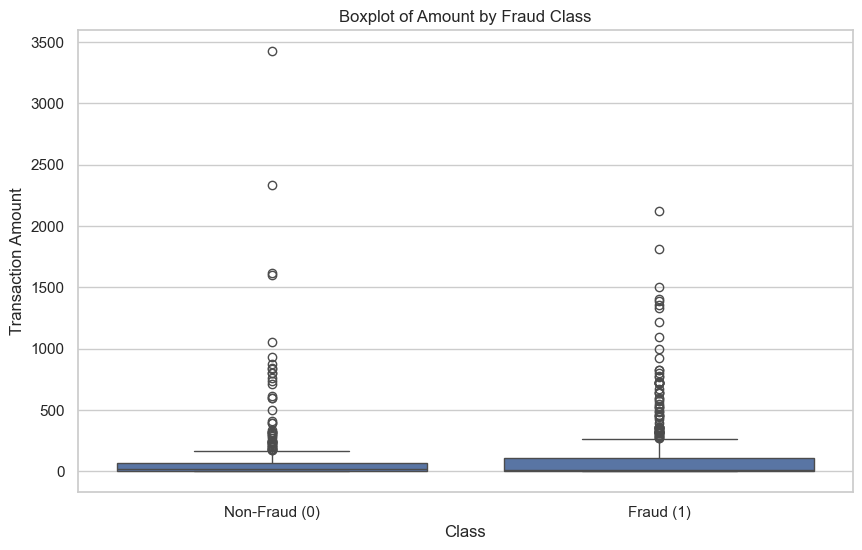

In [162]:
# Bivariate Visualization for Amount vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=pandas_df, x='Class', y='Amount')
plt.title('Boxplot of Amount by Fraud Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

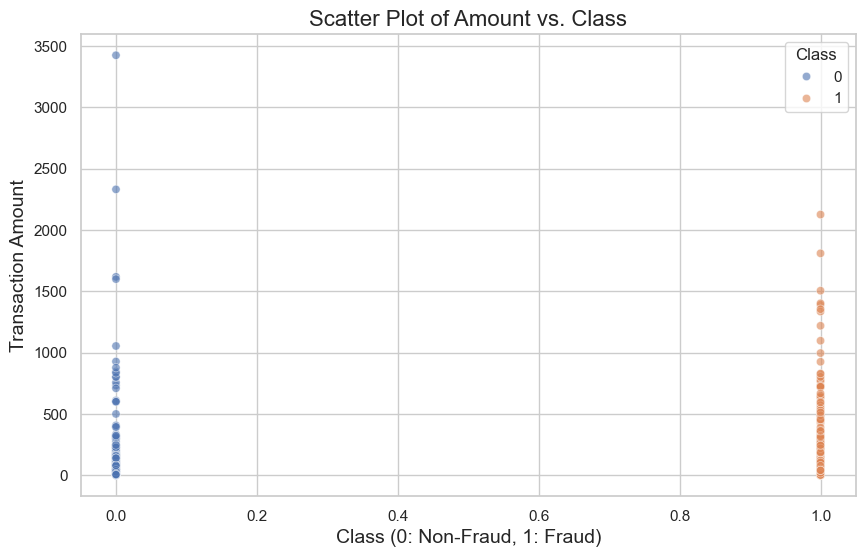

In [182]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=pandas_df, x='Class', y='Amount', hue='Class', alpha=0.6)

# Set plot title and labels
plt.title('Scatter Plot of Amount vs. Class', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)

# Show the plot
plt.grid(True)  # Optional: Add gridlines for better readability
plt.show()


- **From the scatter plot, it is evident that transaction amounts of non-fraud transactions are relatively higher than those of fraudulent transactions.**
- **Fraud Transactions lie between an amount of 0 to near about 2200 dollars.It gives us insight that fraudsters usually target lower transaction amounts**

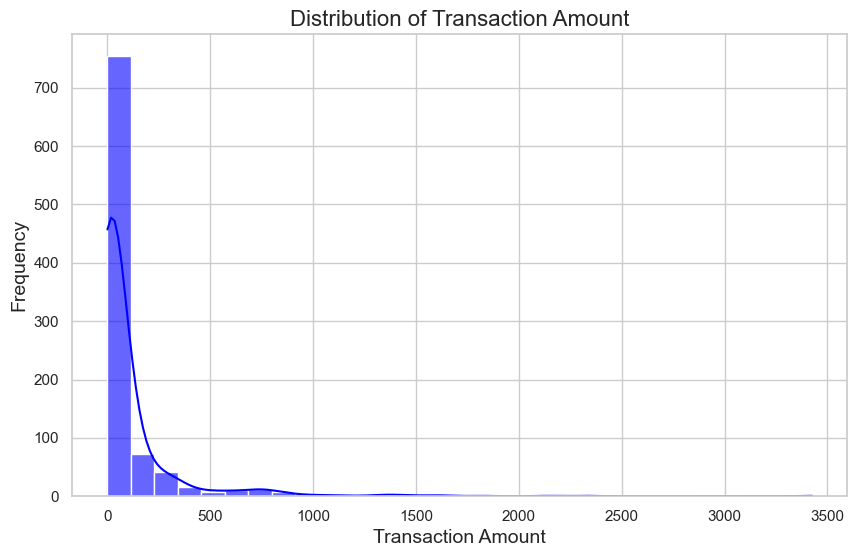

In [180]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate
sns.histplot(data=pandas_df, x='Amount', kde=True, bins=30, color='blue', alpha=0.6)

# Set plot title and labels
plt.title('Distribution of Transaction Amount', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(True)  # Optional: Add gridlines for better readability
plt.show()


**The histogram above shows that majority of transactions lie between an amount ranging from 0 to 2500 dollars and the most common ones range from 0 to 500**

#  3. Data Analysis Using Spark SQL

__Step 1: Register balanced_df as a Temporary View__

In [37]:
# Register the balanced DataFrame as a temporary SQL view
balanced_df.createOrReplaceTempView("creditcard_data")


- __Step 2: Aggregation - Calculate Summary Statistics__
- __Calculate the mean, median (approximate), and standard deviation for all numerical columns.)__

In [39]:
# Aggregation: Summary statistics for numerical columns
aggregation_query = """
SELECT 
    AVG(V1) AS mean_V1, STDDEV(V1) AS stddev_V1,
    AVG(V2) AS mean_V2, STDDEV(V2) AS stddev_V2,
    AVG(V3) AS mean_V3, STDDEV(V3) AS stddev_V3,
    AVG(Amount) AS mean_Amount, STDDEV(Amount) AS stddev_Amount,
    APPROX_PERCENTILE(Amount, 0.5) AS median_Amount
FROM creditcard_data
"""

summary_stats = spark.sql(aggregation_query)
summary_stats.show(truncate=10)


+----------+----------+----------+----------+----------+----------+-----------+-------------+-------------+
|   mean_V1| stddev_V1|   mean_V2| stddev_V2|   mean_V3| stddev_V3|mean_Amount|stddev_Amount|median_Amount|
+----------+----------+----------+----------+----------+----------+-----------+-------------+-------------+
|-2.2122...|5.33985...|1.71469...|3.53835...|-3.3701...|6.03878...| 103.253...|   270.510...|         17.0|
+----------+----------+----------+----------+----------+----------+-----------+-------------+-------------+



# INSIGHTS:
- **Mean Values:**

- V1 and V3 have negative mean values, indicating a skewed distribution, while V2 is positive.
- The mean transaction amount is approximately $103.25, serving as a baseline for comparison.

- **Standard Deviations:**
                                                                                                                                    
- High standard deviations for V1 (5.34) and V3 (6.04) show significant variability, suggesting these features are crucial for differentiating transactions.
- The standard deviation of the amount ($270.51) indicates wide variation in transaction sizes.


- **Median Amount:**

- The median amount of $17.00, significantly lower than the mean, suggests that most transactions are small, with a few high-value transactions inflating the mean.
  
- **1. Fraud Detection Potential:**

- The differences between mean and median suggest that for fraud detection, we should focus on outliers.
- Features with high variability could be important predictors in fraud detection models.

- **2. Anomaly Detection:**

Statistical properties indicate the potential for anomaly detection techniques to flag transactions that deviate significantly from typical behavior.

- **Step 3: Grouping and Filtering**
- **Group data by the Class column (0 for non-fraudulent, 1 for fraudulent) and calculate the average transaction amount and total count of transactions for each class**

In [41]:
# Grouping and Filtering: Average Amount per Class
grouping_query = """
SELECT 
    Class,
    COUNT(*) AS transaction_count,
    AVG(Amount) AS avg_amount
FROM creditcard_data
GROUP BY Class
"""

grouping_stats = spark.sql(grouping_query)
grouping_stats.show()


+-----+-----------------+------------------+
|Class|transaction_count|        avg_amount|
+-----+-----------------+------------------+
|    1|              473|123.87186046511628|
|    0|              467| 82.36929336188435|
+-----+-----------------+------------------+



- In this query, we are trying to analyze the credit card transaction data by calculating the following for each class of transactions (fraudulent and legitimate):

- **Count of Transactions:** We determine how many transactions belong to each class. This helps us understand the volume of transactions that are fraudulent versus those that are legitimate.

- **Average Transaction Amount:** We compute the average amount of transactions for each class. This provides insights into spending behavior, allowing us to see if fraudulent transactions tend to have a higher or lower average amount compared to legitimate transactions.

# INSIGHTS:

- **Prevalence of Fraud:** The dataset shows more fraudulent transactions (473) compared to legitimate ones (467), highlighting a significant fraud concern.

- **Larger Stakes:** Average fraudulent transaction amount 123.87 dollars is greater than  non-fraud transactions 82.37, indicating fraudsters may target larger amounts.


**Step 4: Join**

**In the join below ,creditcard_data is being joined with itself to find pairs of transactions that occurred within a very short time frame (e.g., within one minute) and had the same amount.**

In [43]:
# SQL query for self join to find similar transactions within a minute
self_join_query = """
SELECT 
    a.Time AS transaction_time_a,
    b.Time AS transaction_time_b,
    a.Amount AS amount_a,
    b.Amount AS amount_b,
    a.Class AS class_a,
    b.Class AS class_b
FROM 
    creditcard_data a
JOIN 
    creditcard_data b
ON 
    a.Time <> b.Time  -- Ensure we don't join the same row
    AND ABS(a.Time - b.Time) <= 60  -- Transactions occurring within 60 seconds
    AND a.Amount = b.Amount  -- Same transaction amount
"""

# Execute the self join query
self_join_results = spark.sql(self_join_query)

# Show the results of the self join
self_join_results.show()


+------------------+------------------+--------+--------+-------+-------+
|transaction_time_a|transaction_time_b|amount_a|amount_b|class_a|class_b|
+------------------+------------------+--------+--------+-------+-------+
|           28692.0|           28726.0|   99.99|   99.99|      1|      1|
|           28692.0|           28658.0|   99.99|   99.99|      1|      1|
|            8415.0|            8451.0|     1.0|     1.0|      1|      1|
|            8415.0|            8408.0|     1.0|     1.0|      1|      1|
|           11080.0|           11092.0|     1.0|     1.0|      1|      1|
|           11080.0|           11131.0|     1.0|     1.0|      1|      1|
|            7519.0|            7535.0|     1.0|     1.0|      1|      1|
|            7519.0|            7526.0|     1.0|     1.0|      1|      1|
|            7519.0|            7543.0|     1.0|     1.0|      1|      1|
|            7519.0|            7551.0|     1.0|     1.0|      1|      1|
|           11635.0|           11629.0

- **Conditions for Joining:**

- **Different Rows:** The condition a.Time <> b.Time ensures that the same transaction is not joined with itself.
- **Time Difference:** The condition ABS(a.Time - b.Time) <= 60 filters transactions to include only those that occurred within 60 seconds of each other. This helps identify closely-timed transactions that may indicate suspicious activity.
- **Same Amount:** The condition a.Amount = b.Amount ensures that only transactions with the same amount are considered. This is significant because fraudulent transactions often mimic legitimate ones.


# INSIGHTS:
**1. Frequent Fraud Patterns:**

The dataset reveals multiple instances of fraudulent transactions occurring at nearly the same time with identical amounts. For example, several transactions for $1.00 and $99.99 were made within the same minute. This suggests that fraudsters may be attempting to conduct multiple similar transactions in quick succession.

**2. Potential Fraud Attempts:**

The presence of multiple identical amounts (i.e. 1.00 and $99.99) in close temporal proximity indicates a potential strategy used by fraudsters to test stolen card details. They may start with small amounts to avoid detection before proceeding to higher-value transactions.

**3. Transaction Clustering:**

The clustering of fraudulent transactions at specific times could indicate a coordinated effort, perhaps using automated scripts or bots to execute transactions rapidly. This behavior can help identify patterns in fraudulent activity that can be monitored in real-time by fraud detection systems.

**4. Transaction Amounts:**

The repetition of specific amounts, such as $99.99, can point to a pattern that may be of interest to investigators. It suggests that fraudsters are not only mimicking legitimate transactions but also favoring certain amounts that may help evade detection thresholds.

**Step 5: Time-based analysis**

In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp


In [47]:
# Convert 'Time' to a timestamp
data_with_timestamp = data.withColumn("timestamp_column", to_timestamp("Time"))

# Show the updated DataFrame with the new timestamp column
data_with_timestamp.select("Time","V1","V2","V3","Amount","ScaledAmount","timestamp_column").show(truncate=20)

+------+------------------+-------------------+------------------+------+--------------------+-------------------+
|  Time|                V1|                 V2|                V3|Amount|        ScaledAmount|   timestamp_column|
+------+------------------+-------------------+------------------+------+--------------------+-------------------+
|  26.0|-0.529912284186556|  0.873891581460326|  1.34724732930113|  6.14|[0.02452082189450...|1969-12-31 19:00:26|
| 158.0|-0.600816388115364|  0.922454525911535|-0.135951820418704|  1.79|[0.00714857836989...|1969-12-31 19:02:38|
| 190.0|  -1.5057791635308| -0.215325117259078|  1.99129427646285| 82.29|[0.3286349240551719]|1969-12-31 19:03:10|
| 265.0|-0.491003017302294|  0.906952627077483|  1.64542281975857|  9.03|[0.03606238138556...|1969-12-31 19:04:25|
| 459.0|-0.528217504778877|  0.981231846386665|   1.6529880537617|  6.99|[0.02791539821540...|1969-12-31 19:07:39|
| 775.0| -3.90081029867848|  -3.09837020429443| -0.21342836428919|1528.9| [6.105

In [49]:
data_with_timestamp.printSchema()


root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

**"Time" column is converted to timestamp for our SQL query**

In [51]:
# Register as a temporary view
data_with_timestamp.createOrReplaceTempView("creditcard_data")

In [53]:
from datetime import datetime
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr

In [55]:
# SQL query for time-based analysis
time_analysis_query = """
SELECT 
    DATE(timestamp_column) AS transaction_date,  
    COUNT(*) AS total_transactions, 
    SUM(CASE WHEN Class = 1 THEN 1 ELSE 0 END) AS total_fraud,
    SUM(CASE WHEN Class = 0 THEN 1 ELSE 0 END) AS total_non_fraud
FROM 
    creditcard_data
GROUP BY 
    transaction_date
ORDER BY 
    transaction_date
"""
# Execute the time-based analysis query
time_analysis_results = spark.sql(time_analysis_query)

# Show the results of the time-based analysis
time_analysis_results.show()

+----------------+------------------+-----------+---------------+
|transaction_date|total_transactions|total_fraud|total_non_fraud|
+----------------+------------------+-----------+---------------+
|      1969-12-31|             10617|         44|          10573|
|      1970-01-01|            143856|        288|         143568|
|      1970-01-02|            129253|        141|         129112|
+----------------+------------------+-----------+---------------+



# INSIGHT:
**It can be seen that for**
- **December 31, 1969,the fraud rate is ~ 0.41%**
- **January 1, 1970, the fraud rate is ~0.20%**
- **January 2, 1970, the fraud rate is ~ 0.11%**

**This shows that the fraud rate is very low across all days, which indicates that the majority of transactions are legitimate.**

In [57]:
# Drop the timestamp column
balanced_df = balanced_df.drop("timestamp_column")


# 4.  Machine Learning Model

# Using Logistic Regression

In [99]:
# Step 1: Import Necessary Libraries
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.tuning import CrossValidatorModel
import numpy as np





In [71]:
# Assuming balanced_Df is your DataFrame containing the data
feature_columns = ['V' + str(i) for i in range(1, 29)] + ['Amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')


In [73]:
# Define the Logistic Regression Model: Create an instance of LogisticRegression.
lr = LogisticRegression(labelCol='Class', featuresCol='features')


In [75]:
# Create a Pipeline: Create a pipeline to streamline the model training process.
pipeline = Pipeline(stages=[assembler, lr])


In [77]:
# Split the Data: Split your dataset into training and test sets.
train_data, test_data = balanced_df.randomSplit([0.8, 0.2], seed=42)
print(f"Training Data Count: {train_data.count()}")
print(f"Testing Data Count: {test_data.count()}")

Training Data Count: 754
Testing Data Count: 184


In [79]:
# Fit the Model: Fit the pipeline model to the training data.
pipeline_model = pipeline.fit(train_data)


In [81]:
# Make Predictions: Use the fitted model to make predictions on the test data
predictions = pipeline_model.transform(test_data)


In [91]:
predictions.select("features","Class","rawPrediction","probability","prediction").show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-0.2514709600682...|    1|[-88.372551572783...|[4.17146400271539...|       1.0|
|[-0.4693267051029...|    1|[1.49722003778124...|[0.81715948858933...|       0.0|
|[-12.339603157412...|    1|[-150.80177710444...|[3.21825418246989...|       1.0|
|[-29.200328590574...|    1|[-44.013154022229...|[7.67944929072589...|       1.0|
|[-4.8443715221398...|    1|[-104.21540814572...|[5.4931734587053E...|       1.0|
|[-3.8430090343853...|    1|[-56.543136480303...|[2.77733224966634...|       1.0|
|[-6.1596069303632...|    1|[-113.72425754057...|[4.07551495944983...|       1.0|
|[-6.1339869480198...|    1|[-89.795605588010...|[1.00522665028588...|       1.0|
|[-10.632374906159...|    1|[-170.13116100835...|[1.29710631668373...|       1.0|
|[-12.8336314219

### MODEL EVALUATION BY USING LOGISTIC REGRESSION

In [133]:
#  Evaluate the Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator,RegressionEvaluator

# Accuracy
# Evaluate using MulticlassClassificationEvaluator for Accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# Precision
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(predictions)

# Recall
evaluator_recall = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)

# AUC (Area Under ROC)
# Evaluate the Model using BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator(labelCol="Class", rawPredictionCol="prediction", metricName="areaUnderROC")
auc = binary_evaluator.evaluate(predictions)

# R² Score
regression_evaluator = RegressionEvaluator(labelCol="Class", predictionCol="prediction", metricName="r2")
r2 = regression_evaluator.evaluate(predictions)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {auc:.2f}")
print(f"R² Score: {r2:.2f}")

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
AUC: 0.95
R² Score: 0.80


### Insights from Metrics of Simple Logistic Regression
**1. Accuracy (0.95):**

An accuracy of 95% indicates that the model correctly identifies the majority of transactions, both fraudulent and non-fraudulent. This high level suggests the model is generally effective in distinguishing between the two classes.

**2. Precision (0.95):**
Precision measures the proportion of true positive predictions (fraudulent transactions) among all predicted positives. A precision of 95% implies that when the model predicts a transaction as fraudulent, it is highly likely to be correct. This is crucial in fraud detection as it minimizes the risk of falsely accusing legitimate transactions.

**3. Recall (0.95):**

Recall reflects the model's ability to identify all actual fraudulent transactions. A recall of 95% means the model successfully detects 95% of actual fraud cases. This is vital for fraud detection, as missing a fraudulent transaction can lead to significant financial losses.

**4. AUC (0.95):**

The AUC (Area Under the ROC Curve) value of 0.95 indicates excellent discriminatory power. It shows that the model is highly effective in distinguishing between fraudulent and non-fraudulent transactions across different thresholds, providing confidence in its predictions.

**5. R² Score (0.80):**

The R² score of 0.80 suggests that the model explains that 80% of the variability in the target variable(fraud or non-fraud) is explained by the independent features. This indicates a strong relationship between the features used and the likelihood of fraud, contributing to the model's overall reliability.

# 5. Model Tuning and Evaluation by using Random Search CV

In [103]:

import random
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression  # Import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator,RegressionEvaluator
from pyspark.ml.tuning import CrossValidator

In [105]:
# Step 3: Sample a smaller subset of the data for faster analysis
subset_fraction = 0.05  # Use a smaller fraction for quicker processing
subset_data = balanced_df.sample(fraction=subset_fraction, seed=42)



In [107]:
# Step 4: Define features and target variable
feature_columns = [col for col in subset_data.columns if col != 'Class']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_data = assembler.transform(subset_data)
final_data = assembled_data.select("features", "Class")



In [109]:
# Step 5: Define the model
lr = LogisticRegression(labelCol="Class", featuresCol="features")



In [111]:
# Step 6: Create a random parameter grid for hyperparameter tuning
# Define the number of random combinations you want to try
num_random_combinations = 5  # Fewer combinations for faster analysis



In [113]:
# Create lists of possible values for hyperparameters
reg_param_options = [0.01, 0.1, 0.5, 1.0]
max_iter_options = [10, 20, 50]

# Generate random combinations of hyperparameters
random_param_grid = []
for _ in range(num_random_combinations):
    reg_param = random.choice(reg_param_options)
    max_iter = random.choice(max_iter_options)
    random_param_grid.append({lr.regParam: reg_param, lr.maxIter: max_iter})

# Create a CrossValidator with random parameter grid
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=random_param_grid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="accuracy"),
                          numFolds=3)  # Use fewer folds for quicker evaluation



In [115]:
# Run cross-validation
cv_model = crossval.fit(final_data)


In [117]:
# Step 7: Evaluate the best model
best_model = cv_model.bestModel
best_reg_param = best_model.getRegParam()
best_max_iter = best_model.getMaxIter()


print("Best Hyperparameters found by Random Search CV:")
print(f"  - Regularization Parameter (regParam): {best_reg_param}")
print(f"  - Maximum Iterations (maxIter): {best_max_iter}")

Best Hyperparameters found by Random Search CV:
  - Regularization Parameter (regParam): 0.1
  - Maximum Iterations (maxIter): 10


# Brief Insights on Best Hyperparameters with Respect to Fraud and Non-Fraud Transactions
**Regularization Parameter (regParam = 0.1):**

A moderate regularization value of 0.1 indicates the model is effectively balancing complexity and generalization, crucial for fraud detection. It helps prevent overfitting, ensuring the model captures significant patterns in fraudulent transactions while minimizing false positives in legitimate (non-fraud) transactions.

**Maximum Iterations (maxIter = 10):**

The model's convergence in just 10 iterations suggests that the data is well-structured and the features are informative, allowing the model to quickly learn to distinguish between fraud and non-fraud cases. However, this low iteration count may indicate potential limitations in fully exploring complex patterns, which could be important for improving detection rates.

**Overall Implications:**

The selected hyperparameters reflect a model capable of identifying fraudulent transactions while maintaining a low false positive rate for non-fraud transactions. However, further tuning or adjustments may enhance performance, especially in ensuring robust detection amidst the challenges of imbalanced classes inherent in fraud detection.







In [127]:
# Make predictions using the best model
cv_predictions = cv_model.transform(final_data)


In [129]:
# Display the predictions DataFrame
cv_predictions.show()


+--------------------+-----+--------------------+--------------------+----------+
|            features|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[7519.0,1.2342350...|    1|[-1.6993653385839...|[0.15454817369072...|       1.0|
|[52814.0,-1.10184...|    1|[0.20962191903594...|[0.55221442195946...|       0.0|
|[62467.0,-5.34466...|    1|[-4.7827106565677...|[0.00830374163537...|       1.0|
|[134766.0,-0.0796...|    1|[-1.6665288632486...|[0.15888752037769...|       1.0|
|[154493.0,-7.3815...|    1|[-2.6269229215390...|[0.06742567825698...|       1.0|
|[34521.0,1.081233...|    1|[0.78886356535579...|[0.68758726395612...|       0.0|
|[102114.0,-28.255...|    1|[-9.0801231293323...|[1.13894607769569...|       1.0|
|[142394.0,-3.3677...|    1|[-3.8830903689166...|[0.02017182553281...|       1.0|
|[169347.0,1.37855...|    1|[-1.1990675722143...|[0.23164113175019...|       1.0|
|[41646.0,-3.240

### Model Evaluation afyter Hyperparameter Tuning
After hyperparameter tuning, evaluate the best model on the test data.



In [131]:

#  Evaluate the Model
# Accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(cv_predictions)

# Precision
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(cv_predictions)

# Recall
evaluator_recall = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(cv_predictions)

# AUC (Area Under ROC)
binary_evaluator = BinaryClassificationEvaluator(labelCol="Class", rawPredictionCol="prediction", metricName="areaUnderROC")
auc = binary_evaluator.evaluate(cv_predictions)

# R² Score
regression_evaluator = RegressionEvaluator(labelCol="Class", predictionCol="prediction", metricName="r2")
r2 = regression_evaluator.evaluate(cv_predictions)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {auc:.2f}")
print(f"R² Score: {r2:.2f}")

Accuracy: 0.91
Precision: 0.92
Recall: 0.91
AUC: 0.91
R² Score: 0.63


# INSIGHTS & PERFORMANCE COMPARISON:
**1. Performance Drop After Tuning:**

The model's performance metrics dropped after hyperparameter tuning, indicating that the initial high performance may have resulted from overfitting to the training data. This overfitting could lead to poorer identification of fraudulent transactions when encountering new, unseen data.

**2. Accuracy Analysis:**

Accuracy decreased from 95% to 91%, reflecting a more realistic assessment of the model's ability to generalize. While still strong, this reduction highlights the model's improved robustness in distinguishing between fraudulent and non-fraudulent transactions.

**3. Precision and Recall:**

Precision fell from 95% to 92%, and recall dropped from 95% to 91%. This indicates a slight increase in the model's errors regarding correctly identifying fraudulent transactions (precision) and capturing all actual fraud cases (recall). Despite this decrease, the model remains effective at identifying fraud relative to legitimate transactions.

**4. AUC Interpretation:**

The AUC decreased from 0.95 to 0.91, suggesting a slight reduction in the model's capability to distinguish between fraudulent and non-fraudulent transactions. However, the model still demonstrates good performance overall.

**5. R² Score:**

The R² score dropped from 0.80 to 0.63, indicating that the model accounts for less variability in predicting fraudulent transactions compared to non-fraudulent ones. This could suggest potential issues in capturing the underlying patterns associated with fraud after tuning.

# CONCLUSION:
- **Model Generalization:** The drop in performance metrics after hyperparameter tuning indicates that the tuned model is more generalized, reducing the risk of overfitting. This is crucial for fraud detection, as a well-generalized model can more effectively identify fraudulent transactions in diverse, unseen datasets.

- **Model Evaluation:** Although the tuned model shows slightly lower performance metrics, it is better equipped to accurately classify fraud in real-world scenarios. This trade-off enhances the model's reliability, prioritizing generalization to reduce false negatives and improve overall fraud detection effectiveness.